In [3]:
import chart

In [10]:
#Example demeo
#chart.demo_ex().show()


#Data sample
############
x_data = ['journal','book','proceedings','dataset','others']
data_sample = {
     'Open in COCI': {'x': x_data, 'y': [1000,2000,3000,2500,5000] },
     'Close in Crossref': {'x': x_data, 'y': [400,600,300,850,1800] }
}

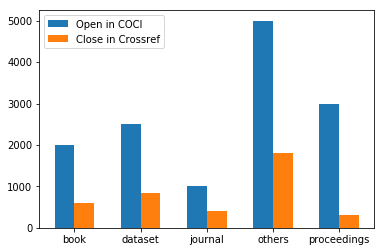

In [11]:
chart.plotBars(data_sample).show()